<a href="https://colab.research.google.com/github/fellow-coder/melusi-zwane/blob/main/volitilty_10_1s%20algorithmic%20trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# description abou the program
# this progra uses the dual moving average crossover to determine when to trade

In [1]:
#import the librabries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving Volatility 10.csv.xlsx to Volatility 10.csv.xlsx


In [10]:
#store the data
Volatility = pd.read_excel('Volatility 10.csv.xlsx')
#show data
Volatility

,Date,Time,Open,High,Low,Close
0,2021-09-30,00:00:00,8751.45,8783.03,8734.63,8768.06
1,2021-10-01,00:00:00,8767.92,8854.15,8767.43,8853.42
2,2021-10-02,00:00:00,8853.60,8894.25,8809.36,8811.52
3,2021-10-03,00:00:00,8811.49,8927.97,8795.68,8909.59
4,2021-10-04,00:00:00,8909.43,8962.64,8908.64,8943.01
...,...,...,...,...,...,...
95,2022-01-03,00:00:00,8782.48,8849.78,8765.68,8841.05
96,2022-01-04,00:00:00,8841.01,8867.27,8808.68,8824.27
97,2022-01-05,00:00:00,8824.26,8829.31,8681.94,8690.79
98,2022-01-06,00:00:00,8690.73,8705.45,8639.12,8666.04


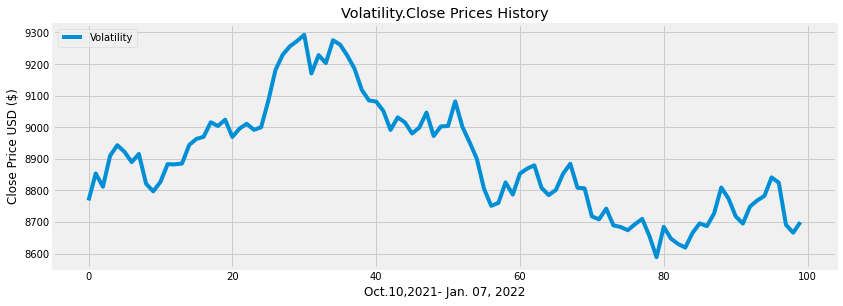

In [13]:
#visualize the data
plt.figure (figsize=(12.5, 4.5))
plt.plot(Volatility['Close'], label ='Volatility')
plt.title('Volatility.Close Prices History')
plt.xlabel('Oct.10,2021- Jan. 07, 2022')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [17]:
#create the simple moving avaerage with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Close'] = Volatility['Close'].rolling(window= 30).mean()
SMA30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
95,8723.457333
96,8722.506667
97,8716.062333
98,8711.316000


In [19]:
#create a simple  moving 100 day avaerage
SMA100 = pd.DataFrame()
SMA100['Close'] = Volatility['Close'].rolling(window=100).mean()
SMA100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
95,NaN
96,NaN
97,NaN
98,NaN


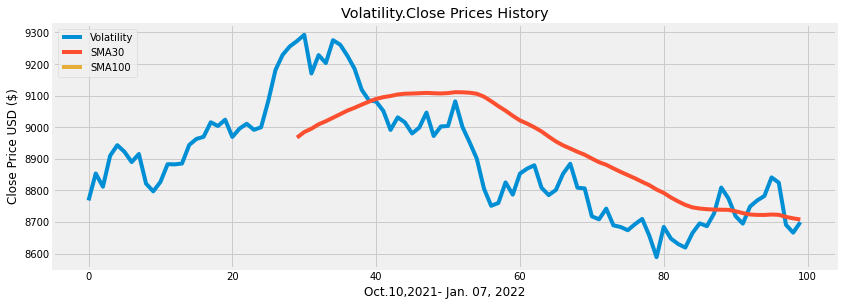

In [47]:
#visualise the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(Volatility['Close'], label ='Volatility')
plt.plot(SMA30['Close'], label = 'SMA30')
plt.plot(SMA100['Close'], label = 'SMA100')
plt.title('Volatility.Close Prices History')
plt.xlabel('Oct.10,2021- Jan. 07, 2022')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [22]:
#create a  new data frame to store all the data
data = pd.DataFrame()
data['Volatility'] = Volatility['Close']
data['SMA30']= SMA30['Close']
data['SMA100'] = SMA100['Close']
data

,Volatility,SMA30,SMA100
0,8768.06,NaN,NaN
1,8853.42,NaN,NaN
2,8811.52,NaN,NaN
3,8909.59,NaN,NaN
4,8943.01,NaN,NaN
...,...,...,...
95,8841.05,8723.457333,NaN
96,8824.27,8722.506667,NaN
97,8690.79,8716.062333,NaN
98,8666.04,8711.316000,NaN


In [52]:
#function to create a buy and sell signal
def buy_sell(data):
  sigPriceBuy =[]
  sigPricesell=[]
  flag= -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['Volatility'][i])
        sigPricesell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
    elif data['SMA30'] [i] < data['SMA100'][i]:
      if flag!= 0: 
        sigPriceBuy.append(np.nan)
        sigPricesell.append(data['Volatility'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPricesell.append(np.nan)

  return (sigPriceBuy, sigPricesell)      


In [53]:
#store the buy and sell daata into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['sell_Signal_Price'] = buy_sell[1]

In [54]:
#show the data
data

,Volatility,SMA30,SMA100,Buy_Signal_Price,sell_Signal_Price
0,8768.06,NaN,NaN,NaN,NaN
1,8853.42,NaN,NaN,NaN,NaN
2,8811.52,NaN,NaN,NaN,NaN
3,8909.59,NaN,NaN,NaN,NaN
4,8943.01,NaN,NaN,NaN,NaN
...,...,...,...,...,...
95,8841.05,8723.457333,NaN,NaN,NaN
96,8824.27,8722.506667,NaN,NaN,NaN
97,8690.79,8716.062333,NaN,NaN,NaN
98,8666.04,8711.316000,NaN,NaN,NaN


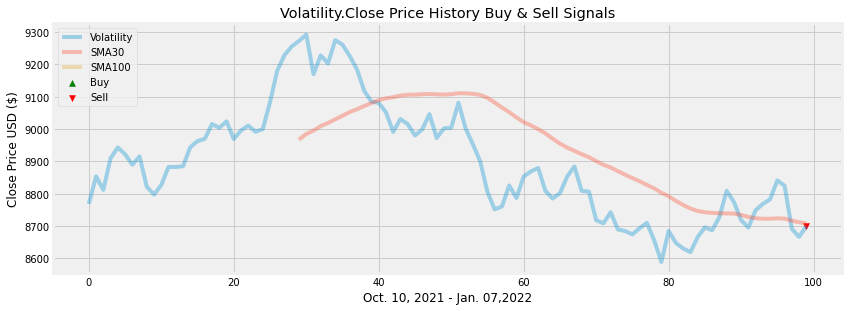

In [55]:
#viusalise the data and the startergy to buy and sell the stock
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['Volatility'], label = 'Volatility', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index,data['sell_Signal_Price'], label = 'Sell', marker ='v', color = 'red')
plt.title('Volatility.Close Price History Buy & Sell Signals')
plt.xlabel('Oct. 10, 2021 - Jan. 07,2022')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()